In [1]:
print('hello')

hello


In [3]:
import networkx as nx
import osmnx as ox
ox.config(use_cache=True, log_console=True)
place_name = "Thua Thien Hue, Vietnam"

# get a graph, set 'w3' edge attribute
G = ox.graph_from_place(place_name)
# nx.set_edge_attributes(G, 100, 'w3')

# save graph to disk
ox.save_graphml(G, 'graph.graphml')

# load graph from disk and confirm 'w3' edge attribute is there
G2 = ox.load_graphml('graph.graphml')
G2

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17880\85312681.py:3: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.config(use_cache=True, log_console=True)


In [55]:
type(G2)

networkx.classes.multidigraph.MultiDiGraph

In [39]:

nodes, edges = ox.graph_to_gdfs(G2)
nodes

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
420510938,16.360842,107.734266,3,NaN,NaN,POINT (107.73427 16.36084)
420511052,16.326745,107.761064,3,NaN,NaN,POINT (107.76106 16.32675)
619882796,16.351854,107.447260,3,NaN,NaN,POINT (107.44726 16.35185)
619882820,16.353934,107.447636,3,NaN,NaN,POINT (107.44764 16.35393)
619882907,16.350126,107.497511,3,NaN,NaN,POINT (107.49751 16.35013)
...,...,...,...,...,...,...
11765959173,16.569359,107.384239,3,NaN,NaN,POINT (107.38424 16.56936)
11765959174,16.572210,107.383704,3,NaN,NaN,POINT (107.38370 16.57221)
11765959175,16.570777,107.382703,3,NaN,NaN,POINT (107.38270 16.57078)


In [42]:
import networkx as nx
import osmnx as ox
# ox.config(use_cache=True, log_console=True)
# # load graph from disk and confirm 'w3' edge attribute is there
# G2 = ox.load_graphml('graph.graphml')
# define origin and desination locations 

origin_point = (16.362970,107.768783) 
destination_point = (16.464537,107.590396)
# get the nearest nodes to the locations 
origin_node = ox.distance.nearest_nodes(G2, origin_point[1], origin_point[0]) 
destination_node = ox.distance.nearest_nodes(G2, destination_point[1], destination_point[0])
# printing the closest node id to origin and destination points origin_node, destination_node
origin_node, destination_node



(7759326796, 472092967)

In [29]:
nodes

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
420510938,16.360842,107.734266,3,NaN,NaN,POINT (107.73427 16.36084)
420511052,16.326745,107.761064,3,NaN,NaN,POINT (107.76106 16.32675)
619882796,16.351854,107.447260,3,NaN,NaN,POINT (107.44726 16.35185)
619882820,16.353934,107.447636,3,NaN,NaN,POINT (107.44764 16.35393)
619882907,16.350126,107.497511,3,NaN,NaN,POINT (107.49751 16.35013)
...,...,...,...,...,...,...
11765959173,16.569359,107.384239,3,NaN,NaN,POINT (107.38424 16.56936)
11765959174,16.572210,107.383704,3,NaN,NaN,POINT (107.38370 16.57221)
11765959175,16.570777,107.382703,3,NaN,NaN,POINT (107.38270 16.57078)


In [27]:
nodes[]

SyntaxError: invalid syntax (2069656561.py, line 1)

In [18]:
origin_node, destination_node

(7811157116, 7811157116)

In [19]:
route_nodes

[7811157116]

In [20]:
origin_node

7811157116

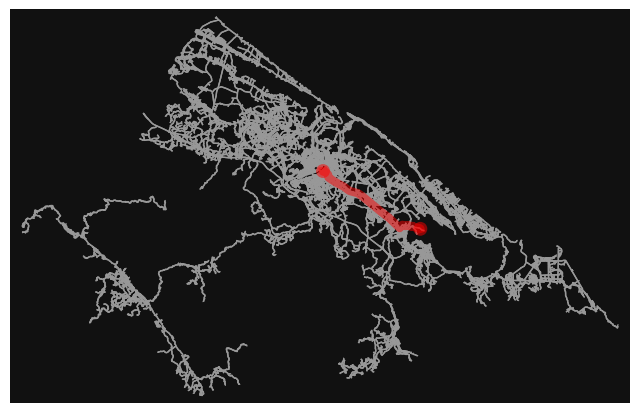

In [43]:
# find shortest path
route_nodes = ox.routing.shortest_path(G2, origin_node, destination_node, weight="length")

nodes = nodes.set_index('id').reindex(shortest_route).reset_index()
# Store all the route information into a DataFrame keeping only useful columns
route_df = nodes[['id', 'lon', 'lat']]

In [49]:

nodes = nodes.set_index('id').reindex(shortest_route).reset_index()
# Store all the route information into a DataFrame keeping only useful columns
route_df = nodes[['id', 'lon', 'lat']]
route_df

KeyError: "None of ['id'] are in the columns"

In [48]:
route_nodes
ox.routing.route_to_gdf(G2, route_nodes, weight='length')

,,,osmid,oneway,ref,name,highway,reversed,length,geometry,bridge,lanes,junction
u,v,key,,,,,,,,,,,
7759326796,7738641163,0,829029501,False,NaN,NaN,residential,True,1692.497,"LINESTRING (107.76904 16.36322, 107.76902 16.3...",NaN,NaN,NaN
7738641163,7738641158,0,"[910359618, 491618603]",False,NaN,NaN,unclassified,False,391.184,"LINESTRING (107.75482 16.36773, 107.75474 16.3...",NaN,NaN,NaN
7738641158,7786124117,0,829029498,False,NaN,NaN,residential,True,493.386,"LINESTRING (107.75221 16.36673, 107.75208 16.3...",NaN,NaN,NaN
7786124117,7786124111,0,829029498,False,NaN,NaN,residential,True,42.378,"LINESTRING (107.74817 16.36888, 107.74789 16.3...",NaN,NaN,NaN
7786124111,7738641153,0,829029498,False,NaN,NaN,residential,True,39.680,"LINESTRING (107.74782 16.36905, 107.74778 16.3...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5913516471,1857088455,0,626381259,True,QL.1,Hùng Vương,primary,False,4.049,"LINESTRING (107.59487 16.46346, 107.59484 16.4...",NaN,NaN,roundabout
1857088455,10873164017,0,39419741,True,QL.1,Hà Nội,primary,False,123.672,"LINESTRING (107.59484 16.46344, 107.59435 16.4...",NaN,3,NaN
10873164017,10873164019,0,39419741,True,QL.1,Hà Nội,primary,False,302.235,"LINESTRING (107.59368 16.46353, 107.59240 16.4...",NaN,3,NaN


In [50]:
route_nodes

[7759326796,
 7738641163,
 7738641158,
 7786124117,
 7786124111,
 7738641153,
 7786124102,
 7738640966,
 7786124139,
 7738640906,
 7738640910,
 7786134766,
 7786134757,
 7786134748,
 7738640915,
 7786134728,
 7786134726,
 7786134702,
 7738629168,
 6738470171,
 6738470174,
 7779850202,
 7738798214,
 7738798208,
 7738798222,
 7738798242,
 6738495191,
 11009515894,
 7738797689,
 6738495208,
 7738797695,
 6738495210,
 7738797711,
 7738797713,
 6738495217,
 7779793246,
 7732968249,
 5913726946,
 7732968240,
 11771464662,
 5913726962,
 5913726967,
 7759700577,
 7759752496,
 5913699931,
 2231939691,
 5913700040,
 2233630327,
 2233630314,
 2233630332,
 2233640779,
 2233640778,
 2233640776,
 1617928685,
 1616666735,
 5913662171,
 2233620104,
 5913662170,
 2233620099,
 5913662257,
 2233620110,
 2233620108,
 5913662192,
 5913662194,
 2233620112,
 5913662561,
 5913662564,
 5913662195,
 10792731786,
 5913662264,
 10792731785,
 10792731783,
 8403879170,
 7755083232,
 7755083229,
 5913662265,
 591366

In [44]:
route_nodes

[7759326796,
 7738641163,
 7738641158,
 7786124117,
 7786124111,
 7738641153,
 7786124102,
 7738640966,
 7786124139,
 7738640906,
 7738640910,
 7786134766,
 7786134757,
 7786134748,
 7738640915,
 7786134728,
 7786134726,
 7786134702,
 7738629168,
 6738470171,
 6738470174,
 7779850202,
 7738798214,
 7738798208,
 7738798222,
 7738798242,
 6738495191,
 11009515894,
 7738797689,
 6738495208,
 7738797695,
 6738495210,
 7738797711,
 7738797713,
 6738495217,
 7779793246,
 7732968249,
 5913726946,
 7732968240,
 11771464662,
 5913726962,
 5913726967,
 7759700577,
 7759752496,
 5913699931,
 2231939691,
 5913700040,
 2233630327,
 2233630314,
 2233630332,
 2233640779,
 2233640778,
 2233640776,
 1617928685,
 1616666735,
 5913662171,
 2233620104,
 5913662170,
 2233620099,
 5913662257,
 2233620110,
 2233620108,
 5913662192,
 5913662194,
 2233620112,
 5913662561,
 5913662564,
 5913662195,
 10792731786,
 5913662264,
 10792731785,
 10792731783,
 8403879170,
 7755083232,
 7755083229,
 5913662265,
 591366

In [3]:
origin_node, destination_node

(7811157116, 7811157116)

[{'latitude': 107.7690448, 'longitude': 16.3632241},
 {'latitude': 107.7548168, 'longitude': 16.3677343},
 {'latitude': 107.7522114, 'longitude': 16.3667284},
 {'latitude': 107.7481699, 'longitude': 16.3688831},
 {'latitude': 107.7478152, 'longitude': 16.3690515},
 {'latitude': 107.747445, 'longitude': 16.3690454},
 {'latitude': 107.7474187, 'longitude': 16.3690411},
 {'latitude': 107.7460126, 'longitude': 16.3698078},
 {'latitude': 107.7445105, 'longitude': 16.3687202},
 {'latitude': 107.7426719, 'longitude': 16.3686007},
 {'latitude': 107.7415467, 'longitude': 16.3681697},
 {'latitude': 107.7407878, 'longitude': 16.3688928},
 {'latitude': 107.7407064, 'longitude': 16.3690174},
 {'latitude': 107.7406341, 'longitude': 16.3690923},
 {'latitude': 107.7400983, 'longitude': 16.3693703},
 {'latitude': 107.7399778, 'longitude': 16.369385},
 {'latitude': 107.7391623, 'longitude': 16.3694271},
 {'latitude': 107.73816, 'longitude': 16.3685661},
 {'latitude': 107.733318, 'longitude': 16.3670025}

In [24]:
G2.nodes[origin_node],G2.nodes[destination_node]

({'y': 16.7356843, 'x': 107.3962149, 'street_count': 1},
 {'y': 16.7356843, 'x': 107.3962149, 'street_count': 1})

In [7]:
nodes, edges = ox.graph_to_gdfs(G2)
nodes

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
420510938,16.360842,107.734266,3,NaN,NaN,POINT (107.73427 16.36084)
420511052,16.326745,107.761064,3,NaN,NaN,POINT (107.76106 16.32675)
619882796,16.351854,107.447260,3,NaN,NaN,POINT (107.44726 16.35185)
619882820,16.353934,107.447636,3,NaN,NaN,POINT (107.44764 16.35393)
619882907,16.350126,107.497511,3,NaN,NaN,POINT (107.49751 16.35013)
...,...,...,...,...,...,...
11765959173,16.569359,107.384239,3,NaN,NaN,POINT (107.38424 16.56936)
11765959174,16.572210,107.383704,3,NaN,NaN,POINT (107.38370 16.57221)
11765959175,16.570777,107.382703,3,NaN,NaN,POINT (107.38270 16.57078)


In [30]:
shortest_path = nx.dijkstra_path(G2, origin_node, 11765959175, weight='length')
shortest_path                                    

[7811157116,
 7755176657,
 7755176652,
 4793233441,
 7759639396,
 7759639400,
 7759639393,
 7759639403,
 3687044552,
 8717711104,
 7754920758,
 7805325179,
 8408903841,
 3844345583,
 7755243148,
 3844345147,
 3687023337,
 4793226366,
 4793226367,
 7802637271,
 7755566162,
 7802637269,
 4793226368,
 4793226369,
 4793226370,
 4793226371,
 4793226372,
 7755628718,
 11736293738,
 11736293737,
 11736293743,
 8078338509,
 11736293728,
 7623307038,
 7732649266,
 7779659166,
 4830375237,
 7759643429,
 4830375228,
 7759643424,
 7808573652,
 4830375226,
 4830375225,
 5966562453,
 11765936863,
 11765936866,
 11765959169,
 11765959172,
 11765959174,
 11765959175]

In [9]:
shortest_path

[7811157116]

In [8]:
nodes.loc[shortest_path]

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
7811157116,16.735684,107.396215,1,NaN,NaN,POINT (107.39621 16.73568)


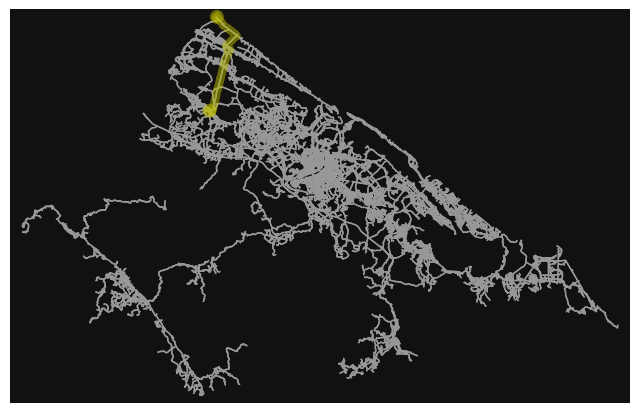

In [32]:

route = ox.shortest_path(G2, origin_node, 11765959175, weight="length")
fig, ax = ox.plot_graph_route(G2, route, route_color="y", route_linewidth=6, node_size=0)

In [1]:

import osmnx as ox
import networkx as nx
place_name = "Thừa Thiên Huế, Vietnam"
graph = ox.graph_from_place(place_name)

nodes, edges = ox.graph_to_gdfs(graph)

import pandas as pd
df = pd.DataFrame(nodes)
df

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
420510938,16.360842,107.734266,3,NaN,NaN,POINT (107.73427 16.36084)
420511052,16.326745,107.761064,3,NaN,NaN,POINT (107.76106 16.32675)
619882762,16.341661,107.441670,3,NaN,NaN,POINT (107.44167 16.34166)
619882796,16.351854,107.447260,3,NaN,NaN,POINT (107.44726 16.35185)
619882820,16.353934,107.447636,3,NaN,NaN,POINT (107.44764 16.35393)
...,...,...,...,...,...,...
11766128544,16.577000,107.365208,3,NaN,NaN,POINT (107.36521 16.57700)
11766128548,16.577389,107.365672,3,NaN,NaN,POINT (107.36567 16.57739)
11766128555,16.577513,107.365060,3,NaN,NaN,POINT (107.36506 16.57751)


In [5]:
edges

osmid       highway  oneway reversed  \
u           v          key                                              
420510938   6738430227 0     717519844  primary_link   False     True   
            7786134818 0     717527544         trunk    True    False   
420511052   6738430107 0      88310285         trunk    True    False   
            7742448431 0     830603686  unclassified   False    False   
619882796   619882820  0     202058762         trunk   False    False   
...                                ...           ...     ...      ...   
11766128548 7805636870 0     830659099   residential   False     True   
            8087344173 0    1266787521   residential   False     True   
11766189790 5966562454 0     631881115   residential   False    False   
            7623307076 0    1266788432   residential   False    False   
            5966562472 0     631881115   residential   False     True   

                             length    ref        name  \
u           v          key                               
420510938   6738430227 0     10.149    NaN         NaN   
            7786134818 0    180.796   QL.1   Quốc lộ 1   
420511052   6738430107 0    289.083   QL.1   Quốc lộ 1   
            7742448431 0     60.211    NaN         NaN   
619882796   619882820  0    238.326  QL.49  Quốc lộ 49   
...                             ...    ...         ...   
11766128548 7805636870 0    263.836    NaN         NaN   
            8087344173 0    114.791    NaN         NaN   
11766189790 5966562454 0    121.318    NaN         NaN   
            7623307076 0    127.396    NaN         NaN   
            5966562472 0    248.037    NaN         NaN   

                                                                     geometry  \
u           v          key                                                      
420510938   6738430227 0    LINESTRING (107.73427 16.36084, 107.73434 16.3...   
            7786134818 0    LINESTRING (107.73427 16.36084, 107.73468 16.3...   
420511052   6738430107 0    LINESTRING (107.76106 16.32675, 107.76262 16.3...   
            7742448431 0    LINESTRING (107.76106 16.32675, 107.76099 16.3...   
619882796   619882820  0    LINESTRING (107.44726 16.35185, 107.44739 16.3...   
...                                                                       ...   
11766128548 7805636870 0    LINESTRING (107.36567 16.57739, 107.36550 16.5...   
            8087344173 0    LINESTRING (107.36567 16.57739, 107.36553 16.5...   
11766189790 5966562454 0    LINESTRING (107.38005 16.57457, 107.37910 16.5...   
            7623307076 0    LINESTRING (107.38005 16.57457, 107.37937 16.5...   
            5966562472 0    LINESTRING (107.38005 16.57457, 107.38156 16.5...   

                           bridge lanes tunnel maxspeed access junction width  
u           v          key                                                     
420510938   6738430227 0      NaN   NaN    NaN      NaN    NaN      NaN   NaN  
            7786134818 0      NaN   NaN    NaN      NaN    NaN      NaN   NaN  
420511052   6738430107 0      NaN   NaN    NaN      NaN    NaN      NaN   NaN  
            7742448431 0      NaN   NaN    NaN      NaN    NaN      NaN   NaN  
619882796   619882820  0      NaN   NaN    NaN      NaN    NaN      NaN   NaN  
...                           ...   ...    ...      ...    ...      ...   ...  
11766128548 7805636870 0      NaN   NaN    NaN      NaN    NaN      NaN   NaN  
            8087344173 0      NaN   NaN    NaN      NaN    NaN      NaN   NaN  
11766189790 5966562454 0      NaN   NaN    NaN      NaN    NaN      NaN   NaN  
            7623307076 0      NaN   NaN    NaN      NaN    NaN      NaN   NaN  
            5966562472 0      NaN   NaN    NaN      NaN    NaN      NaN   NaN  

[90255 rows x 15 columns]

In [3]:
type(edges)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# define origin and desination locations 
origin_point = (33.787201, -84.405076) 
destination_point = (33.764135, -84.394980)
# get the nearest nodes to the locations 
origin_node = ox.get_nearest_node(G, origin_point) 
destination_node = ox.get_nearest_node(G, destination_point)
# printing the closest node id to origin and destination points origin_node, destination_node

In [4]:
df.to_csv('hue_routes.csv')

In [5]:

import osmnx as ox
import networkx as nx
place_name = "Thua Thien Hue, Vietnam"
graph = ox.graph_from_place(place_name)

nodes, edges = ox.graph_to_gdfs(graph)

import pandas as pd
df = pd.DataFrame(nodes)
df

,y,x,street_count,ref,highway,geometry
osmid,,,,,,
420510938,16.360842,107.734266,3,NaN,NaN,POINT (107.73427 16.36084)
420511052,16.326745,107.761064,3,NaN,NaN,POINT (107.76106 16.32675)
619882762,16.341661,107.441670,3,NaN,NaN,POINT (107.44167 16.34166)
619882796,16.351854,107.447260,3,NaN,NaN,POINT (107.44726 16.35185)
619882820,16.353934,107.447636,3,NaN,NaN,POINT (107.44764 16.35393)
...,...,...,...,...,...,...
11766128544,16.577000,107.365208,3,NaN,NaN,POINT (107.36521 16.57700)
11766128548,16.577389,107.365672,3,NaN,NaN,POINT (107.36567 16.57739)
11766128555,16.577513,107.365060,3,NaN,NaN,POINT (107.36506 16.57751)


In [6]:
df.to_csv('hue_province_routes.csv')
